In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
os.chdir(r"C:\Users\HP\Desktop\Power BI\projects\Real estate") #Location Path my laptop

In [3]:
data1=pd.read_csv("output.csv")
data1.head()

,Property_Name,Property Title,Price,Location,Total_Area(SQFT),Price_per_SQFT,Description,Total_Rooms,Balcony,city,property_type,BHK
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",19900000.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Chennai,Flat,4.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,22500000.0,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,Chennai,House,10.0
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",10000000.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,Chennai,Flat,3.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,33300000.0,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,Chennai,House,7.0
4,DRA 90 Degrees,"3 BHK Flat for sale in Pallikaranai, Chennai",13000000.0,"Rose Avenue, Pallikaranai,Chennai",1444,9000.0,Looking for a 3 BHK Apartment for sale in Chen...,3,No,Chennai,Flat,3.0


In [4]:
data=pd.DataFrame(data1.Description)

data.head()

,Description
0,Best 4 BHK Apartment for modern-day lifestyle ...
1,Looking for a 10 BHK Independent House for sal...
2,"Property for sale in Tambaram, Chennai. This 3..."
3,Entire Building for sale with 7 units of singl...
4,Looking for a 3 BHK Apartment for sale in Chen...


# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [5]:
data.Description=data.Description.str.lower()

# Remove url

In [6]:
data.Description = data.Description.str.replace(r'http\S+|www.\S+','',case=False)

# Step 2 :- Punctuation

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [9]:
data.Description=data.Description.apply(lambda x : remove_punctuation(x))  # x = Text 

# Remove Number

In [10]:
data['Description'] = data['Description'].str.replace('\d+','')  # data.text  or data['text']

# Removing Stop Words

In [11]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Description'] = data['Description'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

# Common Words

* manually created as per the case study

In [13]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'expressionist',
 'vestiary',
 'interminable',
 'nonborrower',
 'glycoluric',
 'glottological',
 'Loatuko',
 'baggagemaster',
 'coextensive',
 'ankylopodia',
 'Moschus',
 'parole',
 'illess',
 'epidotization',
 'outboard',
 'undonating',
 'polearm',
 'kivu',
 'alveolodental',
 'encode',
 'picene',
 'closter',
 'squamipinnate',
 'undisinfected',
 'presanctification',
 'hygrine',
 'gastrosoph',
 'mummied',
 'antivaccinationist',
 'intelligence',
 'updive',
 'ventiduct',
 'kroner',
 'carriagesmith',
 'fashious',
 'bushfighting',
 'thoracoscopy',
 'nonprotestation',
 'soree',
 'preterscriptural',
 'arthrolite',
 'wirelessly',
 'inseverably',
 'laxate',
 'antihistamine',
 'Adenostoma',
 'unsweeten',
 'arado',
 'algosis',
 'phrenopathic',
 'gravitationally',
 'heliozoan',
 'predetest',
 'paragnathism',
 'slopeways',
 'cytostomal',
 'cockaded',
 'frumentation',
 'Chesapeake',
 'gumphion',
 'prelacteal',
 'unstoicize',
 'Schiedam',
 'cnemial',
 'concentralization',
 'gametogeny',
 'intervary'

In [14]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [15]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.Description.apply(lambda x: clean_text_round2(x)))
data.iloc[991,0]

'apartment sale property investment location tastefully designed unit among best brokerage property property posted directly owner contact property floor total number apartment price apartment best property spacious area square'

# Stemming 

import nltk
#let's import the libraries
from nltk.stem.snowball import SnowballStemmer

# the most commonly used stemmer
ss = SnowballStemmer("english")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def SnowballStemmer_text(text):
    return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

data.head()

data['text'] = data.text.apply(lambda x :' '.join(SnowballStemmer_text(x)))
data.head()

# Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [18]:
data.Description = data.Description.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[991,0]

'apartment sale property investment location tastefully design unit among best brokerage property property post directly owner contact property floor total number apartment price apartment best property spacious area square'

# Strip extra whitespace

In [19]:
data['Description'] = (data['Description'].astype("str").str.rstrip())
data.iloc[991,0]

'apartment sale property investment location tastefully design unit among best brokerage property property post directly owner contact property floor total number apartment price apartment best property spacious area square'

###  Finished Data Cleaning

# Term Document Matrix

In [20]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,14515,14516,14517,14518,14519,14520,14521,14522,14523,14524
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,14516,14517,14518,14519,14520,14521,14522,14523,14524,freq
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
abacus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1270
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [22]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,14516,14517,14518,14519,14520,14521,14522,14523,14524,freq
0,aam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,abacus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
2,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1270
3,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [23]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
2294,property,44453
139,apartment,23378
161,area,19013
2799,square,17597
2539,sale,17317
2253,price,13403
2041,owner,12752
401,brokerage,11361
3105,unit,11321
305,best,9941


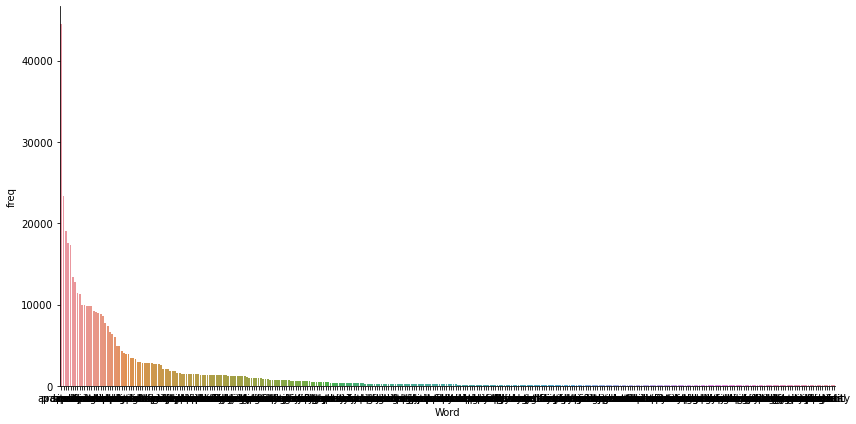

In [24]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=50] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud 

In [25]:
text = " ".join(review for review in data.Description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3785205 words in the combination of all review.


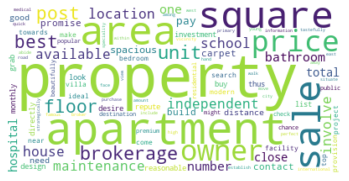

In [26]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis 

In [27]:
data

,Description
0,best apartment available sale brokerage involv...
1,look independent house sale search buy propert...
2,property sale apartment promise location prope...
3,entire build sale single bedroom double bed ro...
4,look apartment sale search buy property locati...
...,...
14520,independent house sale unit available premium ...
14521,property sale colony apartment promise locatio...
14522,check apartment sale property post owner thus ...
14523,independent raw property look good independent...


In [28]:
#!pip install TextBlob

In [29]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['Description'].apply(pol)
data.head(5)

,Description,polarity
0,best apartment available sale brokerage involv...,0.375000
1,look independent house sale search buy propert...,0.080000
2,property sale apartment promise location prope...,0.250000
3,entire build sale single bedroom double bed ro...,0.253571
4,look apartment sale search buy property locati...,0.366667


In [30]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Description,polarity,Sentiment
0,best apartment available sale brokerage involv...,0.375000,Positive
1,look independent house sale search buy propert...,0.080000,Positive
2,property sale apartment promise location prope...,0.250000,Positive
3,entire build sale single bedroom double bed ro...,0.253571,Positive
4,look apartment sale search buy property locati...,0.366667,Positive


<AxesSubplot:>

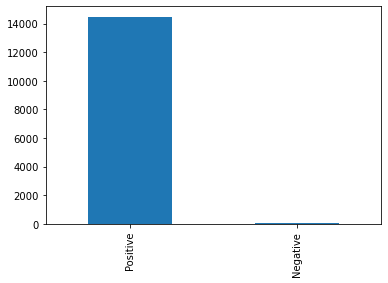

In [31]:
data.Sentiment.value_counts().plot.bar()

In [32]:
data.to_csv('sentiment.csv', index=False)